## Artifacts in a project
NOTE: Please insert the password in order to access to the database and select one of the available projects

In [10]:
from widget_funcs import show_project_widget
import getpass
import ipywidgets as widgets

# Input parameters
password = getpass.getpass('Enter password for the mongodb database:')
projectW = show_project_widget(password)

display(projectW)

Enter password for the mongodb database:········


Dropdown(description='Project:', index=2, options=('OpenCV', 'mythaistar2', 'mythaistar', 'mydb', 'mydb2', 'te…

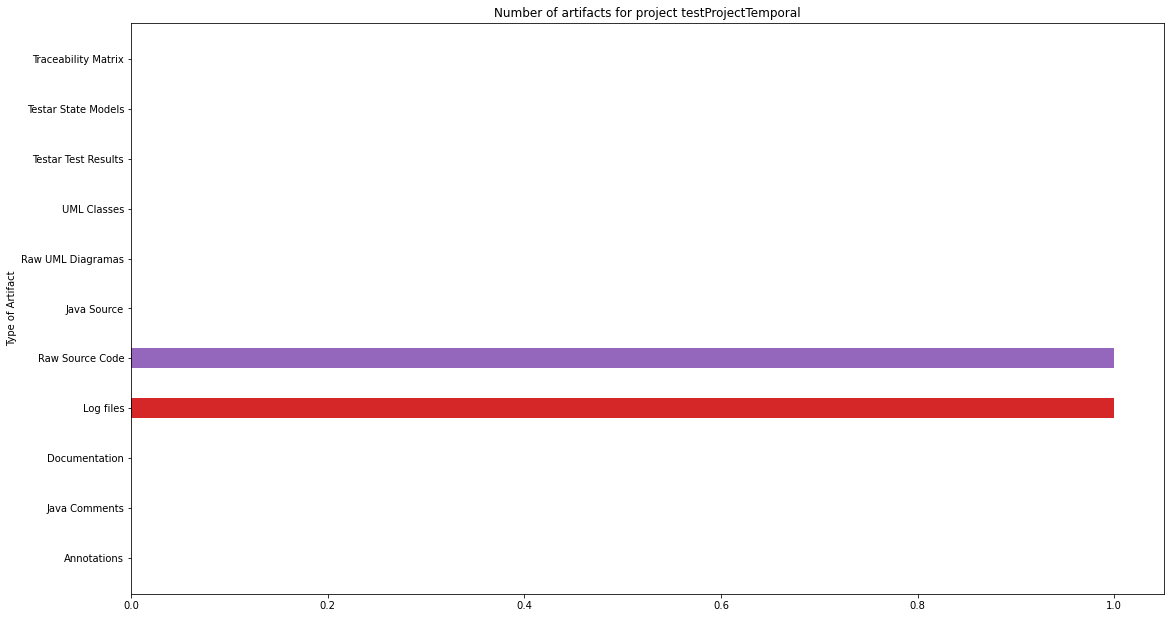

In [11]:
from pymongo import MongoClient
from decoderpkm import GetConn, GetConf
from IPython.display import HTML, display
import pymongo
import urllib.parse
import matplotlib.pyplot as plt
import numpy as np

# Take project name from widget
project = projectW.value

client = GetConn(password)

collectionNames = [ 'Annotations', 'commentsjava', 'Documentation', 'Logs',
                    'RawSourcecode', 'sourcecodeJava', 'RawUML', 'UMLClasses', 
                    'TESTARStateModels', 'TESTARTestResults', 'TraceabilityMatrix']

collectionLabels = ['Annotations', 'Java Comments', 'Documentation', 'Log files',
                    'Raw Source Code', 'Java Source', 'Raw UML Diagramas', 'UML Classes',
                    'Testar Test Results', 'Testar State Models', 'Traceability Matrix']

counts = []

for i in collectionNames:
    counts.append([])

i = 0
for col in collectionNames:
    count = client[project][col].count_documents({})
    counts[i].append(count)
    i = i + 1
    
y = np.arange(len(collectionNames))

def normalize(n):
    ret = n
    if (ret > 50):
        ret = 50
    return ret

width = 1  # the width of the bars
fig, ax = plt.subplots()

i = 0
for colName in collectionNames:
    countArray = list(map( normalize, counts[i] ))
    ax.barh(i, countArray, height=0.4, label=colName)
    i = i + 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Type of Artifact')
ax.set_title('Number of artifacts for project ' + project)
ax.set_yticks(y)
ax.set_yticklabels(collectionLabels)
# ax.legend()

fig.set_size_inches(18.5, 10.5)

plt.show()